In [9]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
import forestplot as fp
print(f"{fp.__version__=}")
import matplotlib.pyplot as plt
def save_mpl_fig(savename):
    savepath = os.path.join('../docs/images', savename)
    plt.savefig(f'{savepath}.png', dpi='figure', bbox_inches='tight')

df = fp.load_data("sleep")
df

fp.__version__='0.2.1'


,n,r,CI95%,p-val,BF10,power,var,hl,ll,moerror,group,label
0,706,0.090373,[0.02 0.16],1.630887e-02,8.390000e-01,0.67,age,0.16,0.02,0.069627,age,in years
1,706,0.048081,[-0.03 0.12],2.019484e-01,1.060000e-01,0.25,clerical,0.12,-0.03,0.071919,occupation,=1 if clerical worker
2,706,0.041229,[-0.03 0.11],2.739475e-01,8.600000e-02,0.19,construc,0.11,-0.03,0.068771,occupation,=1 if construction worker
3,706,-0.095004,[-0.17 -0.02],1.155151e-02,1.137000e+00,0.72,educ,-0.02,-0.17,0.075004,labor factors,years of schooling
4,706,-0.102825,[-0.18 -0.03],6.246660e-03,1.967000e+00,0.78,gdhlth,-0.03,-0.18,0.072825,health factors,=1 if in good or excel. health
5,706,-0.066997,[-0.14 0.01],7.524015e-02,2.290000e-01,0.43,smsa,0.01,-0.14,0.076997,area of residence,=1 if live in smsa
6,706,-0.035909,[-0.11 0.04],3.407214e-01,7.400000e-02,0.16,male,0.04,-0.11,0.075909,other factors,=1 if male
7,706,0.027147,[-0.05 0.1 ],4.714176e-01,6.100000e-02,0.11,prot,0.10,-0.05,0.072853,other factors,=1 if Protestant
8,706,0.001782,[-0.07 0.08],9.623058e-01,4.700000e-02,0.05,selfe,0.08,-0.07,0.078218,labor factors,=1 if self employed
9,706,0.078600,[0. 0.15],3.679946e-02,4.150000e-01,0.55,south,0.15,0.00,0.071400,area of residence,=1 if live in south


### Out-of-box

* Quickstart example
* Estimate and confidence interval will be printed on left

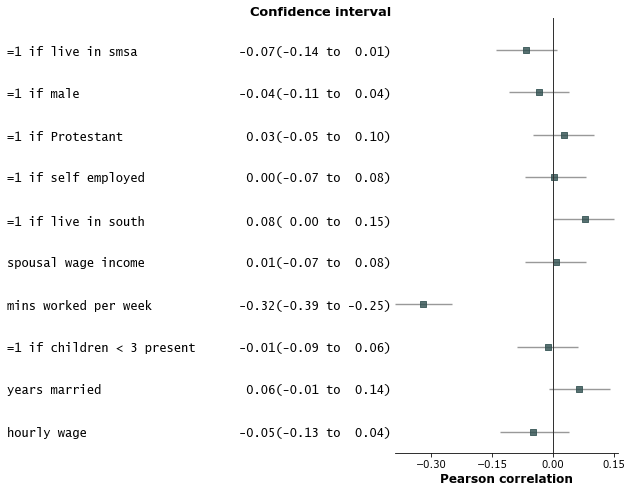

In [2]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              ylabel="Confidence interval",  # y-label title
              xlabel="Pearson correlation"  # x-label title
              )
save_mpl_fig('vanilla')

### Add variable groupings, add group order, and sort by estimate size

* Add group labels (`groupvar`)
* Add group ordering (this is optional, `group_order`)
* Sort estimates (`sort`)
* Capitalize labels (`capitalize`)

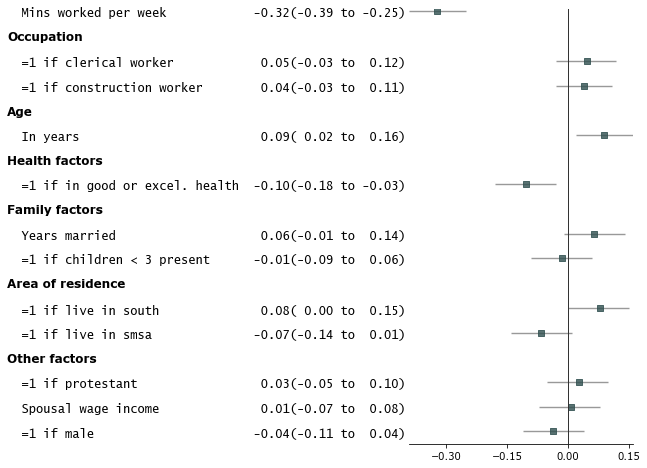

In [3]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits              
              varlabel="label",  # column containing variable label
              capitalize="capitalize",  # Capitalize labels
              groupvar="group",  # Add variable groupings 
              # group ordering
              group_order=["labor factors", "occupation", "age", "health factors", 
                           "family factors", "area of residence", "other factors"],
              sort=True  # sort in ascending order (sorts within group if group is specified)               
              )
save_mpl_fig('group-grouporder-sort')

### Add P-value and color alternate rows gray
* Add (formatted) p-values on the right (`pval`)
* P-values are automatically formatted
* Color alternate colors gray (`color_alt_rows`)

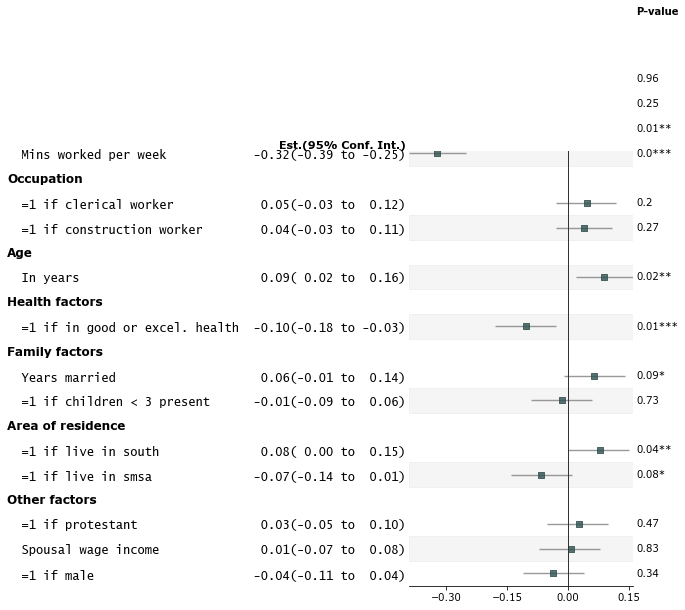

In [4]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              capitalize="capitalize",  # Capitalize labels
              groupvar="group",  # Add variable groupings 
              # group ordering
              group_order=["labor factors", "occupation", "age", "health factors", 
                           "family factors", "area of residence", "other factors"],
              sort=True,  # sort in ascending order (sorts within group if group is specified)               
              pval="p-val",  # Column of p-value to be reported on right
              color_alt_rows=True,  # Gray alternate rows
              ylabel="Est.(95% Conf. Int.)",  # ylabel to print
              **{"ylabel1_size": 11}  # control size of printed ylabel
              )
save_mpl_fig('group-grouporder-pvalue-sort-colorrows')

### Add custom annotations and make it a table
* Add more custom annotations on left and right (`annote` and `rightannote`)
* Add headers for the annotations (`annoteheaders` and `right_annoteheaders`)
* Make the plot a table (`table`)

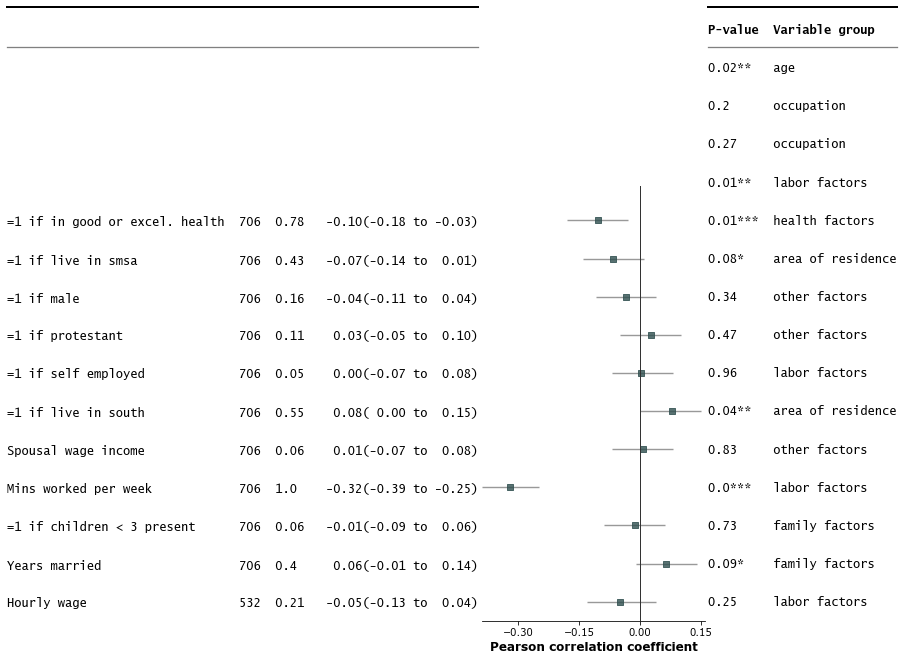

In [5]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              varlabel="label",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              pval="p-val",  # column containing p-values to be formatted
              annote=["n", "power", "est_ci"],  # columns to report on left of plot
              annoteheaders=["N", "Power", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["formatted_pval", "group"],  # columns to report on right of plot 
              right_annoteheaders=["P-value", "Variable group"],  # ^corresponding headers
              xlabel="Pearson correlation coefficient",  # x-label title
              table=True,  # Format as a table
              )
save_mpl_fig('leftannote-rightannote-table')

### Strip down all bells and whistle
* Out-of-box settings but
* Turn off reporting of confidence interval on the left
* Turn off left-flushing of variable labels

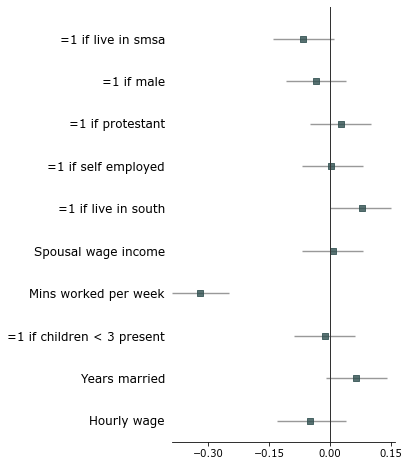

In [6]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              varlabel="label",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              ci_report=False,  # Turn off conf. int. reporting
              flush=False,  # Turn off left-flush of text
              **{'fontfamily': 'sans-serif'}  # revert to sans-serif                              
              )
save_mpl_fig('vcoefplot')

### Forest plot as a table, with multiple customizations

* Multiple annotations on left and right of forest plot (`annote`, `rightannote`)
* Format p-values (`pval`)
* Add variable groupings (`groupvar`) and adjust group order (`group_order`) to report
* Make plot a table (`table`)

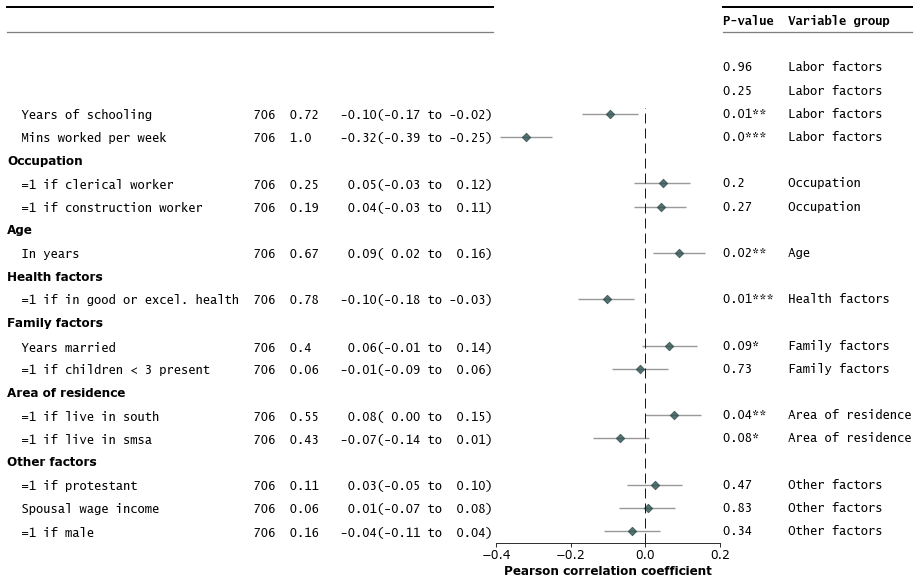

In [7]:
fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              varlabel="label",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              pval="p-val",  # column containing p-values to be formatted
              annote=["n", "power", "est_ci"],  # columns to report on left of plot
              annoteheaders=["N", "Power", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["formatted_pval", "group"],  # columns to report on right of plot 
              right_annoteheaders=["P-value", "Variable group"],  # ^corresponding headers
              groupvar="group",  # column containing group labels
              group_order=["labor factors", "occupation", "age", "health factors", 
                           "family factors", "area of residence", "other factors"],                   
              xlabel="Pearson correlation coefficient",  # x-label title
              xticks=[-.4,-.2,0, .2],  # x-ticks to be printed
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": ".1",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )
save_mpl_fig('main')